# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    grid_params
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,
            double_parabolic_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
                wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

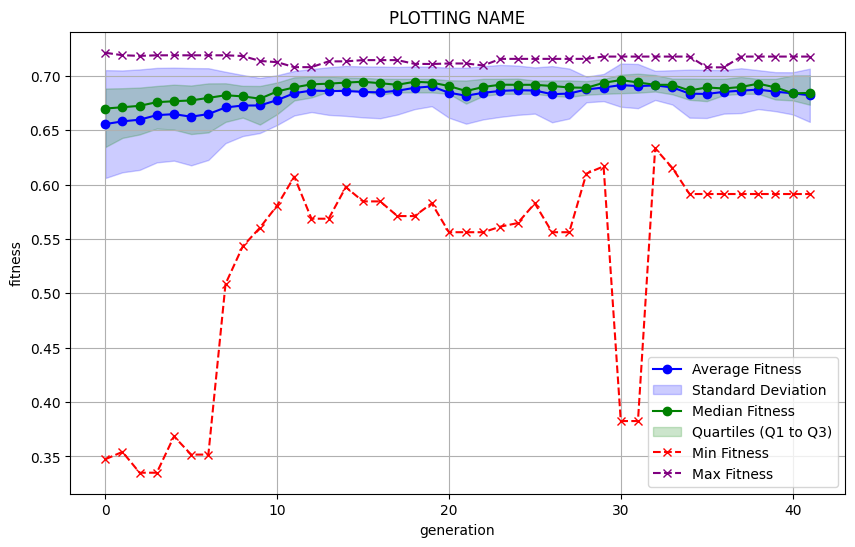

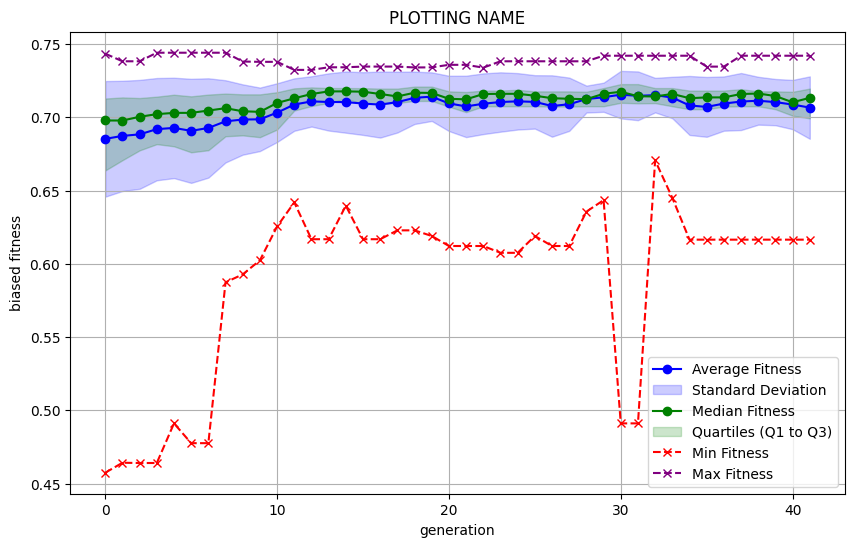

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_445: ['WingShape_445', 'GridStrictTransformation_338']
predict: (0.29070700387252524, 373.06660070000004, 455.87939369999987)
biased_fitness: 0.7197049689747474, fitness: 0.698199989274748
shape parameter:
parameter_list: [ c: 3.9410500613356088, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


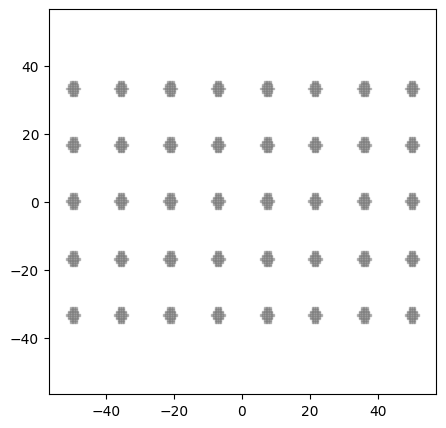

--------------------------------------------------
label: VentHole Chromosome_445: ['CircleShape_76', 'GridStrictTransformation_445']
predict: (0.29404709578944876, 373.29369390000005, 463.8801893)
biased_fitness: 0.668712806205512, fitness: 0.6236596261055121
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


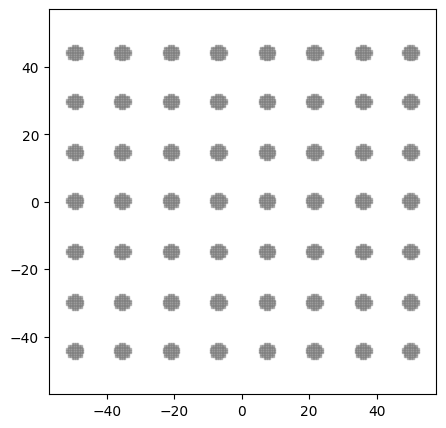

--------------------------------------------------
label: VentHole Chromosome_99: ['CircleShape_445', 'GridStrictTransformation_338']
predict: (0.2904274737811958, 373.22912309999987, 455.2251159)
biased_fitness: 0.7226711686880426, fitness: 0.7034540671880424
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


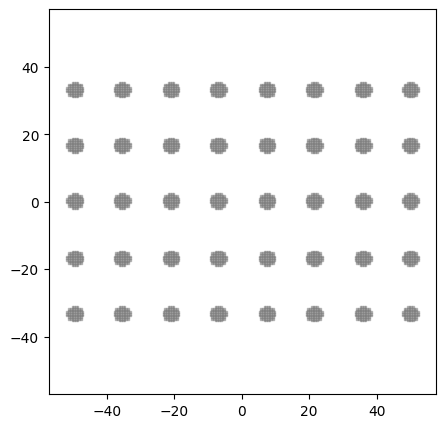

--------------------------------------------------
label: VentHole Chromosome_327: ['TriangleShape_76', 'GridStrictTransformation_99']
predict: (0.2901446972173598, 373.56178859999994, 455.9634423999999)
biased_fitness: 0.7216936228264025, fitness: 0.7009268728264026
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


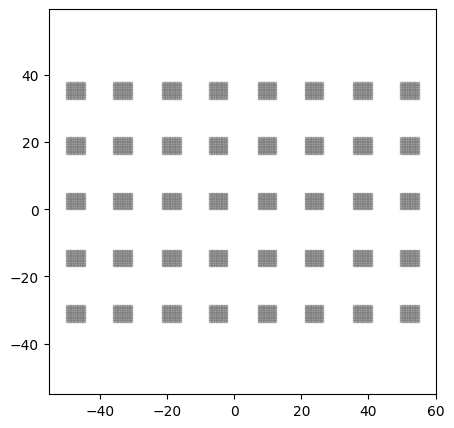

--------------------------------------------------
label: VentHole Chromosome_430: ['TriangleShape_338', 'GridStrictTransformation_445']
predict: (0.2927063747514791, 373.2572739, 457.1800092999998)
biased_fitness: 0.6957753165852095, fitness: 0.67074983648521
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


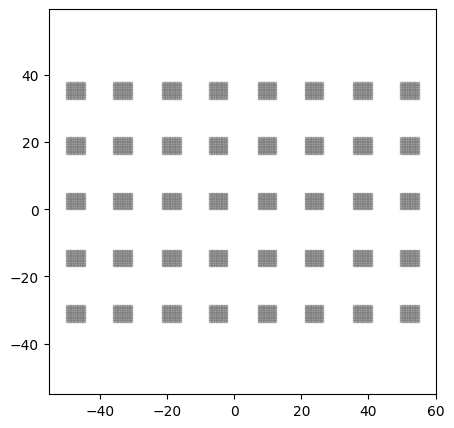

--------------------------------------------------
label: VentHole Chromosome_406: ['CircleShape_406', 'GridStrictTransformation_445']
predict: (0.2903932972129102, 372.98355109999994, 456.1900227000002)
biased_fitness: 0.722802124770898, fitness: 0.7001991588708972
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


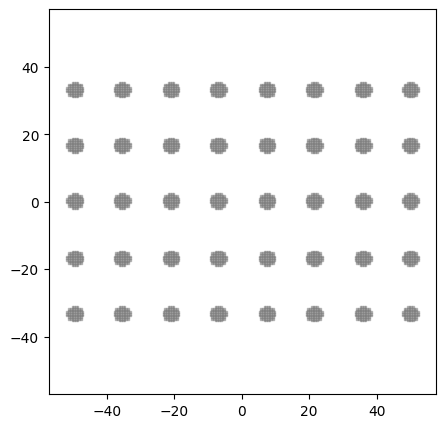

--------------------------------------------------
label: VentHole Chromosome_76: ['CircleShape_99', 'GridStrictTransformation_406']
predict: (0.2910802524126579, 373.0803213, 455.6961847)
biased_fitness: 0.7162428573734211, fitness: 0.6953149458734211
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


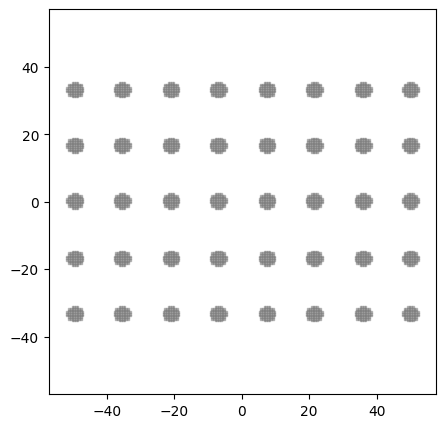

--------------------------------------------------
label: VentHole Chromosome_338: ['TriangleShape_430', 'GridStrictTransformation_430']
predict: (0.2901446972173598, 373.56178859999994, 455.9634423999999)
biased_fitness: 0.7216936228264025, fitness: 0.7009268728264026
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


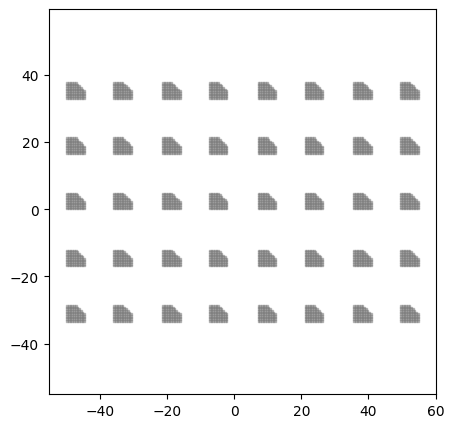

--------------------------------------------------
label: VentHole Chromosome_445: ['TriangleShape_76', 'GridStrictTransformation_3']
predict: (0.2915041826653084, 372.8860875000001, 457.4171037)
biased_fitness: 0.709921353446915, fitness: 0.6834422173469152
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


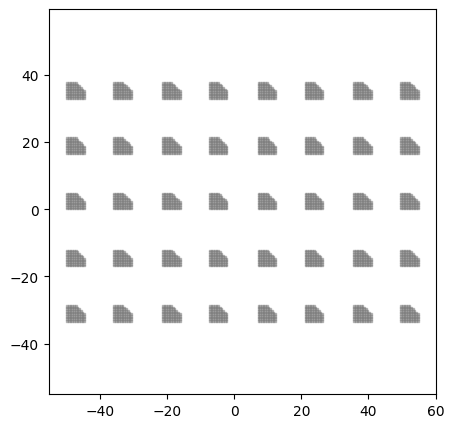

--------------------------------------------------
label: VentHole Chromosome_3: ['WingShape_3', 'GridStrictTransformation_327']
predict: (0.2902646776402036, 373.6105947, 454.44915779999957)
biased_fitness: 0.723180745097965, fitness: 0.7070544610979663
shape parameter:
parameter_list: [ c: 2.4593436573338487, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


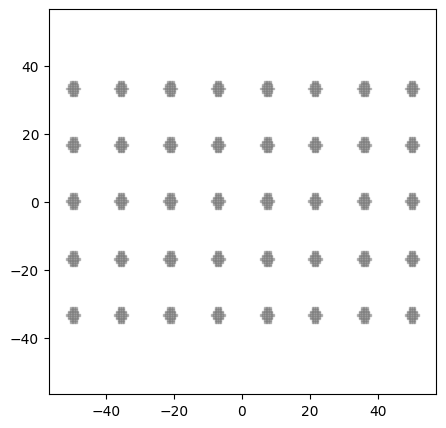

--------------------------------------------------
label: VentHole Chromosome_99: ['TriangleShape_99', 'GridStrictTransformation_3']
predict: (0.2910993513132003, 373.0790526, 454.98079349999995)
biased_fitness: 0.7174915316679968, fitness: 0.698707256367997
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


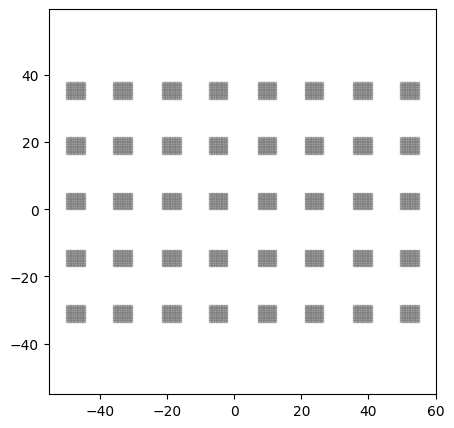

--------------------------------------------------
label: VentHole Chromosome_338: ['DonutShape_338', 'GridStrictTransformation_76']
predict: (0.2999073101541063, 374.11591180000005, 457.8102055000001)
biased_fitness: 0.616495104858936, fitness: 0.5912963119589358
shape parameter:
parameter_list: [ r_inner: 3.0304850502714564, r_outer: 7.2695657026774185, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


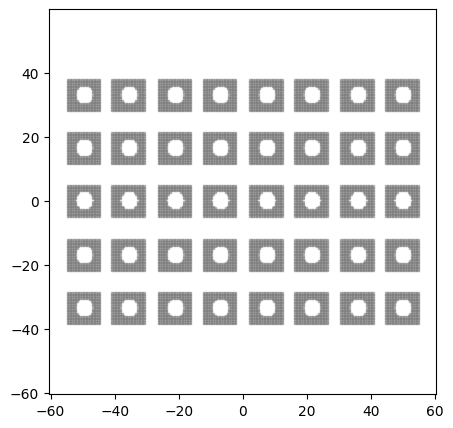

--------------------------------------------------
label: VentHole Chromosome_133: ['TriangleShape_3', 'GridStrictTransformation_338']
predict: (0.29289254999010605, 373.03262739999997, 457.1173757999999)
biased_fitness: 0.6956113566989399, fitness: 0.6703244840989402
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


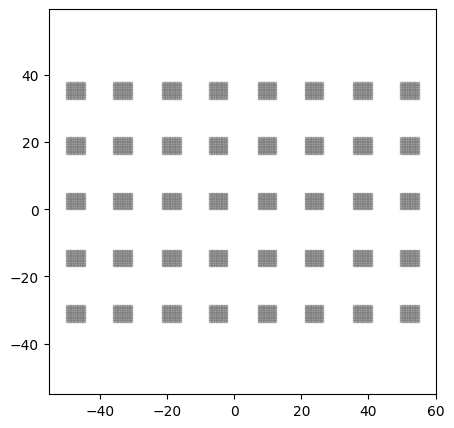

--------------------------------------------------
label: VentHole Chromosome_327: ['WingShape_3', 'GridStrictTransformation_338']
predict: (0.28840857563722544, 372.9149037999999, 456.73350740000006)
biased_fitness: 0.7420429022277462, fitness: 0.7176721876277458
shape parameter:
parameter_list: [ c: 2.4593436573338487, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


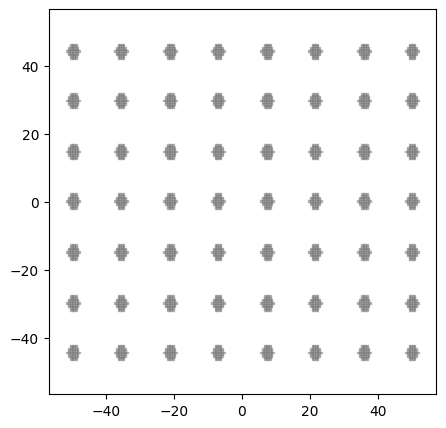

--------------------------------------------------
label: VentHole Chromosome_327: ['WingShape_445', 'GridStrictTransformation_76']
predict: (0.29076760572844806, 372.9483027000002, 458.7296311999999)
biased_fitness: 0.7142265614155177, fitness: 0.6839342732155185
shape parameter:
parameter_list: [ c: 3.9410500613356088, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


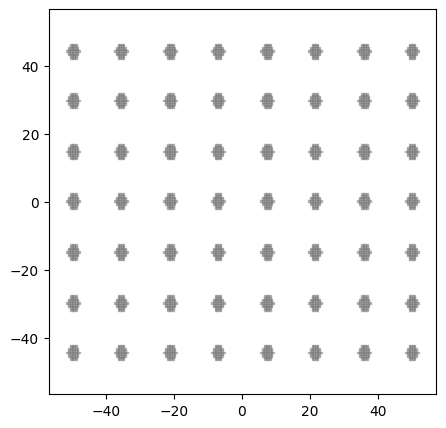

--------------------------------------------------
label: VentHole Chromosome_430: ['TriangleShape_76', 'GridStrictTransformation_263']
predict: (0.2915041826653084, 372.8860875000001, 457.4171037)
biased_fitness: 0.709921353446915, fitness: 0.6834422173469152
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


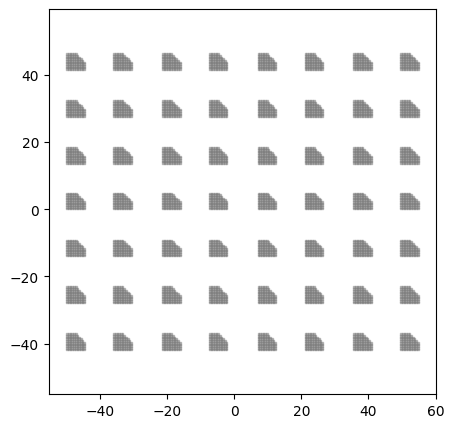

--------------------------------------------------
label: VentHole Chromosome_133: ['WingShape_338', 'GridStrictTransformation_133']
predict: (0.29130060342641384, 373.2646932999999, 456.6199940999999)
biased_fitness: 0.7109011244358623, fitness: 0.6875705287358626
shape parameter:
parameter_list: [ c: 4.1504662021681895, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


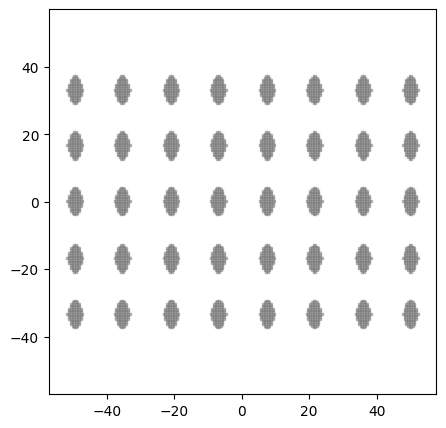

--------------------------------------------------
label: VentHole Chromosome_338: ['DoubleParabolicShape_338', 'GridStrictTransformation_99']
predict: (0.2918604788567638, 373.3055642, 458.27853880000004)
biased_fitness: 0.7016991844323619, fitness: 0.6734746964323617
shape parameter:
parameter_list: [ lower_coefficient: 1.035697268764474, upper_coefficient: 1.9685215842430448, lower_y-intercept: 1.4874650219977572, upper_y-intercept_from_lower_y: 1.0546316116018475, lower_x_trans: 0.10650666398727449, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


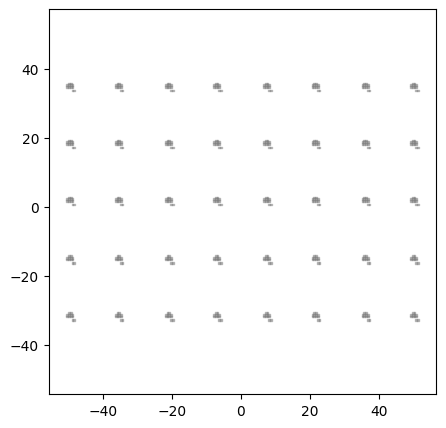

--------------------------------------------------
label: VentHole Chromosome_338: ['DoubleParabolicShape_338', 'GridStrictTransformation_327']
predict: (0.29088020191340647, 372.91098439999996, 457.45377999999977)
biased_fitness: 0.7159135300659359, fitness: 0.6893741588659366
shape parameter:
parameter_list: [ lower_coefficient: 1.035697268764474, upper_coefficient: 1.9685215842430448, lower_y-intercept: 1.4874650219977572, upper_y-intercept_from_lower_y: 1.0546316116018475, lower_x_trans: 0.10650666398727449, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


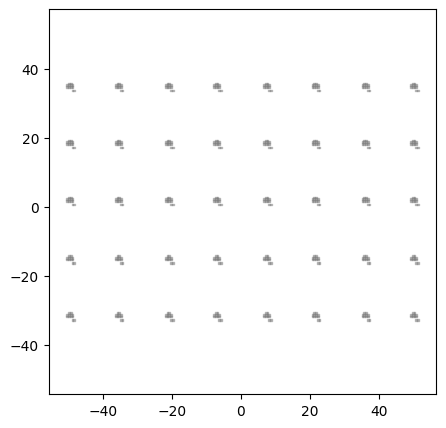

--------------------------------------------------
label: VentHole Chromosome_445: ['WingShape_338', 'GridStrictTransformation_76']
predict: (0.28840857563722544, 372.9149037999999, 456.73350740000006)
biased_fitness: 0.7420429022277462, fitness: 0.7176721876277458
shape parameter:
parameter_list: [ c: 4.1504662021681895, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


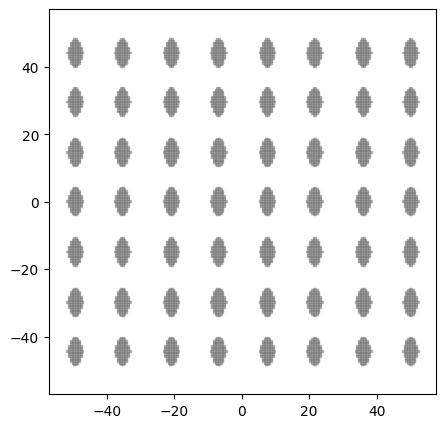

--------------------------------------------------
label: VentHole Chromosome_338: ['DoubleParabolicShape_338', 'GridStrictTransformation_338']
predict: (0.29159723468427945, 373.89570029999993, 457.7892956999999)
biased_fitness: 0.7011791596572061, fitness: 0.6756026731572062
shape parameter:
parameter_list: [ lower_coefficient: 1.035697268764474, upper_coefficient: 1.9685215842430448, lower_y-intercept: 1.4874650219977572, upper_y-intercept_from_lower_y: 1.0546316116018475, lower_x_trans: 0.10650666398727449, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


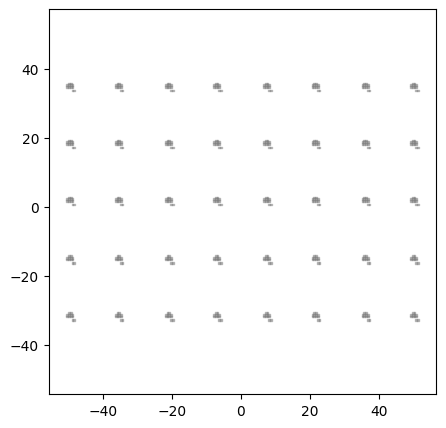

--------------------------------------------------
label: VentHole Chromosome_76: ['TriangleShape_99', 'GridStrictTransformation_76']
predict: (0.2920228519581016, 373.04955459999996, 456.4558401999999)
biased_fitness: 0.7055129178189841, fitness: 0.6822445064189844
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


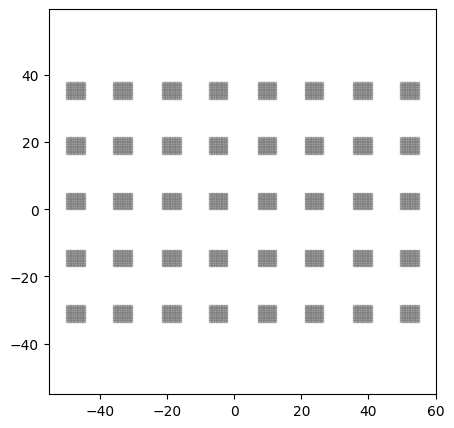

--------------------------------------------------
label: VentHole Chromosome_99: ['TriangleShape_338', 'GridStrictTransformation_76']
predict: (0.2915270472872562, 373.3767626999999, 454.3563448999999)
biased_fitness: 0.7123794984274388, fitness: 0.6960639891274388
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


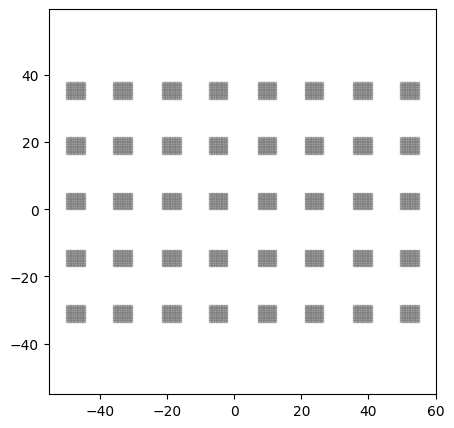

--------------------------------------------------
label: VentHole Chromosome_99: ['WingShape_99', 'GridStrictTransformation_263']
predict: (0.290983017623093, 373.10349039999994, 455.4972166)
biased_fitness: 0.7174509577690705, fitness: 0.6971662887690704
shape parameter:
parameter_list: [ c: 3.9410500613356088, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


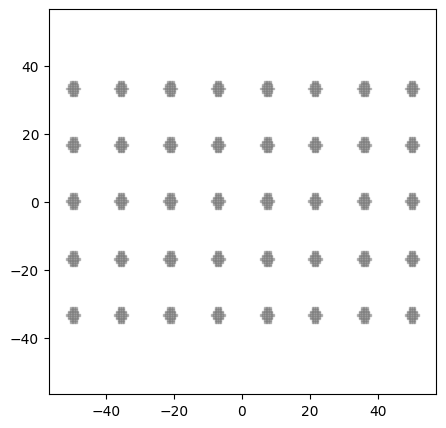

--------------------------------------------------
label: VentHole Chromosome_445: ['TriangleShape_99', 'GridStrictTransformation_76']
predict: (0.2913193569899397, 372.48544570000007, 455.6512558)
biased_fitness: 0.7181057986006023, fitness: 0.6961229226006024
shape parameter:
parameter_list: [ l: 9.36568128351398, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


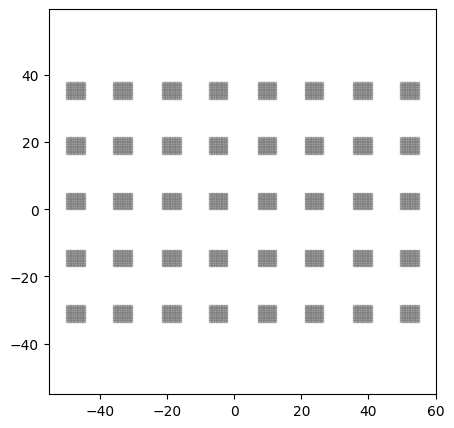

--------------------------------------------------
label: VentHole Chromosome_338: ['DonutShape_327', 'GridStrictTransformation_338']
predict: (0.2975661213238294, 373.1433350000001, 458.65800759999996)
biased_fitness: 0.645019426561705, fitness: 0.6153320737617053
shape parameter:
parameter_list: [ r_inner: 3.0304850502714564, r_outer: 7.2695657026774185, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


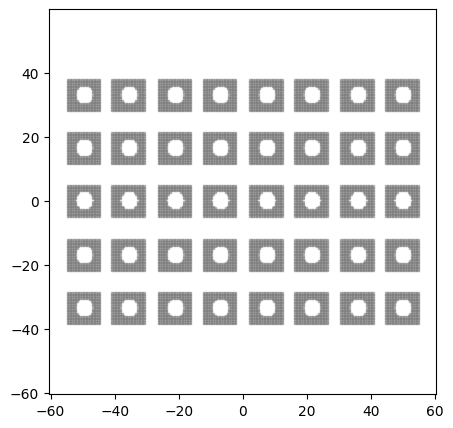

--------------------------------------------------
label: VentHole Chromosome_99: ['DonutShape_338', 'GridStrictTransformation_430']
predict: (0.29204057452342136, 373.32996909999986, 458.5595849999999)
biased_fitness: 0.6991653010657874, fitness: 0.6701464842657875
shape parameter:
parameter_list: [ r_inner: 3.0304850502714564, r_outer: 7.2695657026774185, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


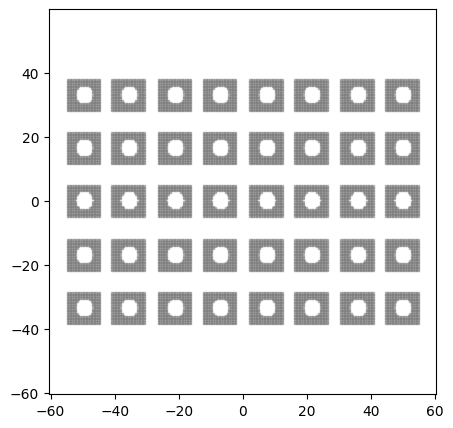

--------------------------------------------------
label: VentHole Chromosome_327: ['CircleShape_76', 'GridStrictTransformation_99']
predict: (0.2915640083882578, 373.0550029000001, 457.22218089999996)
biased_fitness: 0.7085305340174214, fitness: 0.6829739971174217
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


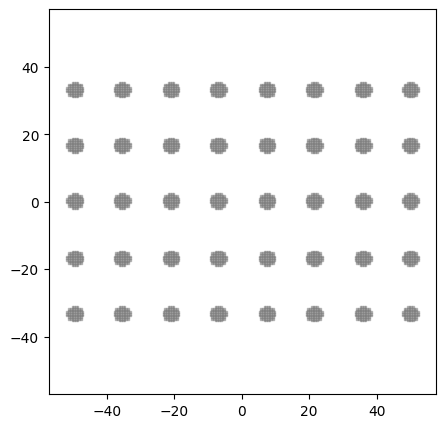

--------------------------------------------------
label: VentHole Chromosome_338: ['CircleShape_99', 'GridStrictTransformation_445']
predict: (0.2904274737811958, 373.22912309999987, 455.2251159)
biased_fitness: 0.7226711686880426, fitness: 0.7034540671880424
shape parameter:
parameter_list: [ r: 2.202056686146766, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


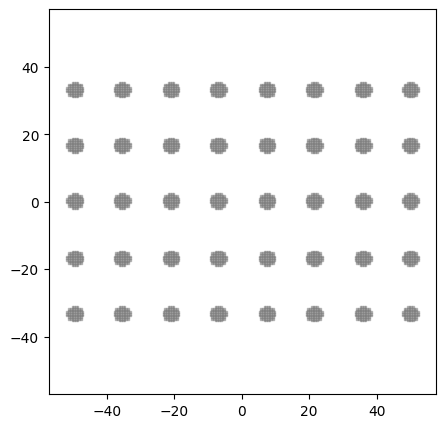

--------------------------------------------------
label: VentHole Chromosome_76: ['DoubleParabolicShape_338', 'GridStrictTransformation_99']
predict: (0.2919246098044408, 372.9371473, 456.3224773999999)
biased_fitness: 0.7075489160555922, fitness: 0.6844557784555925
shape parameter:
parameter_list: [ lower_coefficient: 1.035697268764474, upper_coefficient: 1.9685215842430448, lower_y-intercept: 1.4874650219977572, upper_y-intercept_from_lower_y: 1.0546316116018475, lower_x_trans: 0.10650666398727449, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


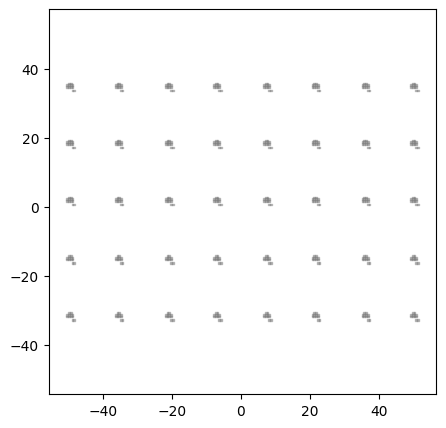

--------------------------------------------------
label: VentHole Chromosome_76: ['WingShape_263', 'GridStrictTransformation_327']
predict: (0.29123144054457883, 372.7943200999998, 456.03658469999993)
biased_fitness: 0.7160521844542129, fitness: 0.6935310705542128
shape parameter:
parameter_list: [ c: 2.4593436573338487, ]
pattern parameter:
parameter_list: [ dx: 4.221881449532971, dy: 6.733080890258221, ]


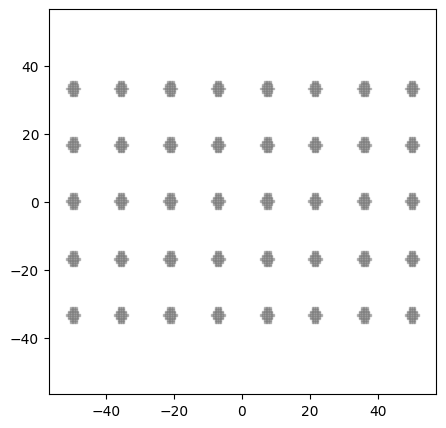

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )